## Imports

In [5]:
import pandas as pd
import numpy as np

## First data analysis

In [20]:
data = pd.read_csv('datasets/kaggle_startups_train_28062024.csv', parse_dates=['founded_at', 'first_funding_at', 'last_funding_at', 'closed_at'])

In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52516 entries, 0 to 52515
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   name               52515 non-null  object        
 1   category_list      50051 non-null  object        
 2   funding_total_usd  42447 non-null  float64       
 3   status             52516 non-null  object        
 4   country_code       47014 non-null  object        
 5   state_code         45753 non-null  object        
 6   region             46157 non-null  object        
 7   city               46157 non-null  object        
 8   funding_rounds     52516 non-null  int64         
 9   founded_at         52516 non-null  datetime64[ns]
 10  first_funding_at   52516 non-null  datetime64[ns]
 11  last_funding_at    52516 non-null  datetime64[ns]
 12  closed_at          4917 non-null   datetime64[ns]
dtypes: datetime64[ns](4), float64(1), int64(1), object(7)
memory 

<Axes: title={'center': 'Значения целевого признака для тренировочного датасета'}, xlabel='status'>

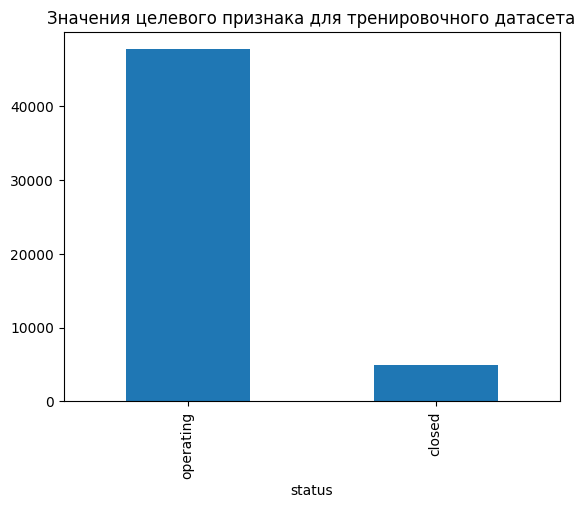

In [17]:
data.status.value_counts().plot(kind='bar', title='Значения целевого признака для тренировочного датасета',)

## First data handling

In [28]:
for col in data.select_dtypes(include='datetime64[ns]').columns:
    print(f'{col}: minimal date {data[col].min()} - maximum date {data[col].max()}')

founded_at: minimal date 1970-02-05 00:00:00 - maximum date 2016-04-02 00:00:00
first_funding_at: minimal date 1977-05-15 00:00:00 - maximum date 2015-12-05 00:00:00
last_funding_at: minimal date 1977-05-15 00:00:00 - maximum date 2015-12-07 00:00:00
closed_at: minimal date 1983-10-06 00:00:00 - maximum date 2017-10-21 00:00:00


In [29]:
data[data['name'].isna()]

,name,category_list,funding_total_usd,status,country_code,state_code,region,city,funding_rounds,founded_at,first_funding_at,last_funding_at,closed_at
3291,NaN,Startups,25000.0,closed,USA,OR,"Portland, Oregon",Portland,1,2011-10-01,2012-03-01,2012-03-01,2013-06-03


In [31]:
data.name = data.name.fillna('Unknown startup')

In [33]:
data.nunique()

name                 52516
category_list        22105
funding_total_usd    15551
status                   2
country_code           134
state_code             300
region                1036
city                  4477
funding_rounds          19
founded_at            5402
first_funding_at      4603
last_funding_at       4305
closed_at             3008
dtype: int64

In [ ]:
from transformers import pipeline

classifier = pipeline("zero-shot-classification", model="facebook/bart-large-mnli")
sequence = data.category_list
candidate_labels = ["IT", "Healthcare", "Finance", "Manufacturing"]
result = classifier(sequence, candidate_labels)
print(result)